In [68]:
import pandas as pd
import seaborn as sns
import plotly.express as px

base = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv")

base.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
range(0,905)

range(0, 905)

In [69]:
base.shape

(569, 33)

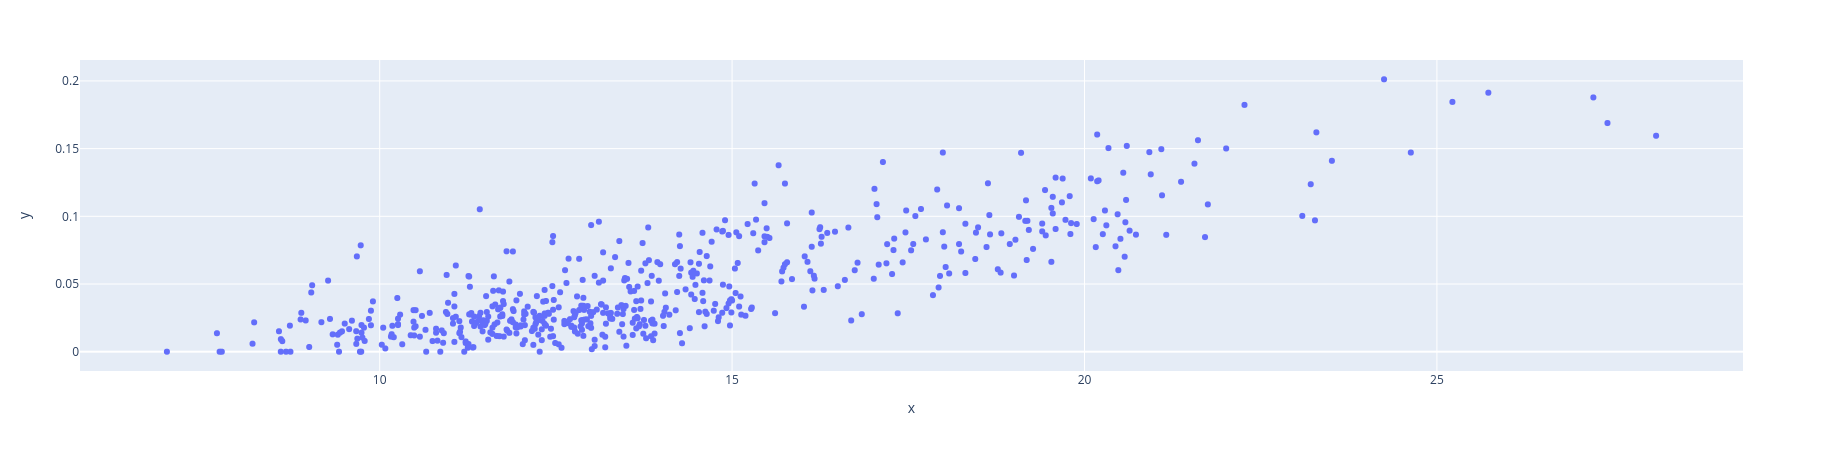

In [70]:
# Podrá predecir si un tumor es maligno o benigno basándose en dos características:
#  el radio medio del tumor ( radius_mean) y su número medio de puntos cóncavos ( concave points_mean

fig = px.scatter(x = base['radius_mean'],
                 y=base['concave points_mean'])

fig.show()

In [71]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Split dataset into 80% train, 20% test
X = base.loc[:,['radius_mean','concave points_mean']]

y = range(569)

In [98]:
#Dividiendo el conjunto de datos entrenamiento y test.

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)

print(X_train.shape)

print(X_test.shape)


(455, 2)
(114, 2)


In [103]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

dt


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [104]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [105]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 140   1
   1   1   1   1   1   1]


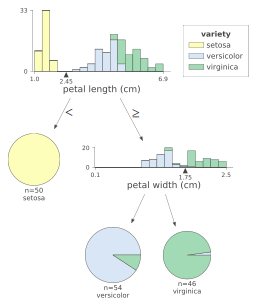

In [3]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *


classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
              feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz


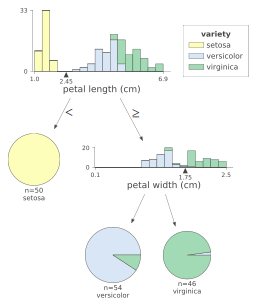

In [6]:
plt.rcParams['figure.figsize'] = [20, 5]

viz